#To take a look at the big picture  

our model should learn from classic dataset contains the prices and other attributes of almost 54,000 diamonds ,and be able to predict the diamond price .
Features :

price : price in US dollars (\$326--\$18,823)

carat: weight of the diamond (0.2--5.01)

Carat is the unit of measurement for the physical weight of diamonds. One carat equals 0.200 grams or 1/5 gram and is subdivided into 100 points. For comparison, in units more familiar in the United States, one carat equals 0.007 ounce avoirdupois. Which would require over 2,265 carats to equal 1 pound!

cut :quality of the cut (Fair, Good, Very Good, Premium, Ideal)

The cut of a diamond refers to how well the diamond’s facets interact with light, the proportions of the diamond, and the overall finish of the diamond.

It is not to be confused with the shape, (like emerald or round,) or facet arrangement, (like brilliant, or step cut), but is instead a reference to the craftsmanship of the diamond and how it factors into the diamond’s brilliance.

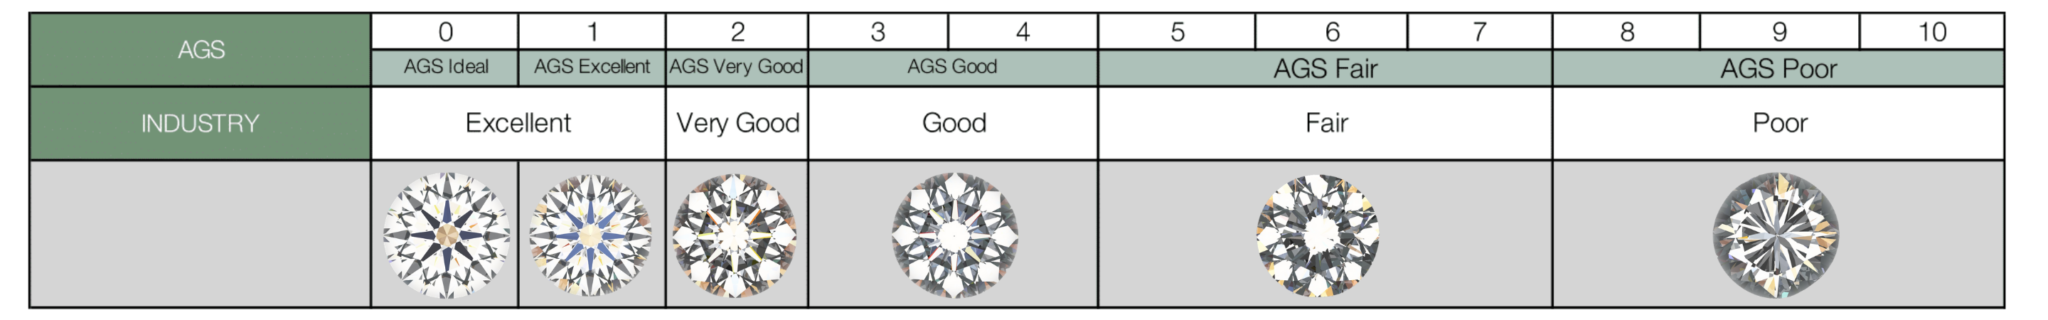

color :diamond color, from J (worst) to D (best)

The Color of a diamond actually refers to the lack of color in a diamond, with perfectly colorless diamonds considered the highest quality with the highest value, and brown or yellow diamonds being the lowest quality.

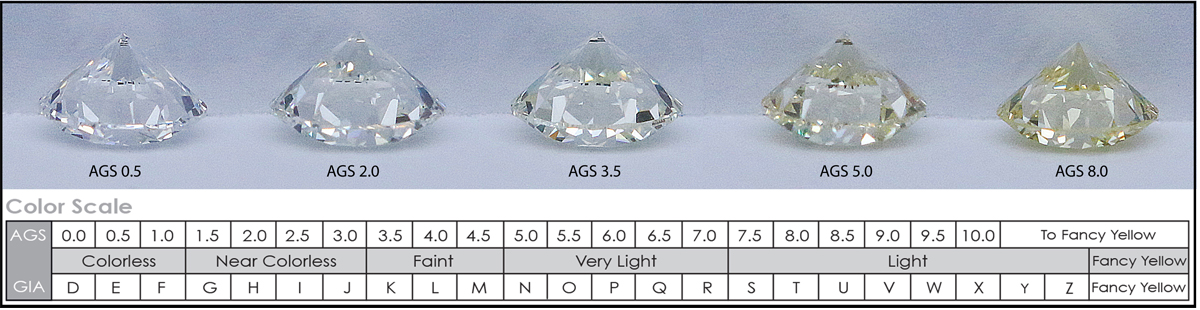

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Clarity is the state of being clear or transparent. Diamond clarity is the presence or absence of characteristics called inclusions in the diamond.

When grading the clarity of a diamond, the lab determines the relative visibility of the inclusions in a diamond and their impact on the overall visual appearance.

So, what are these inclusions that affect clarity? In short, inclusions are the internal or external flaws of the diamond. The size and severity of these flaws determines the grade.

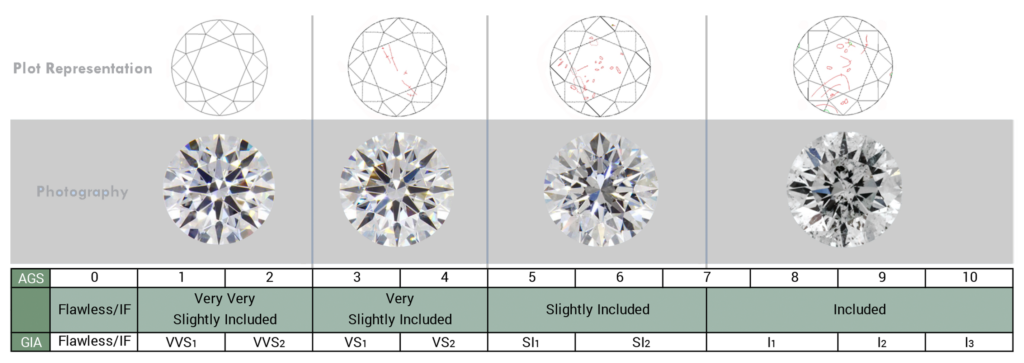

x :length in mm (0--10.74)

y :width in mm (0--58.9)

z :depth in mm (0--31.8)

depth :total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table :width of top of diamond relative to widest point (43--95)


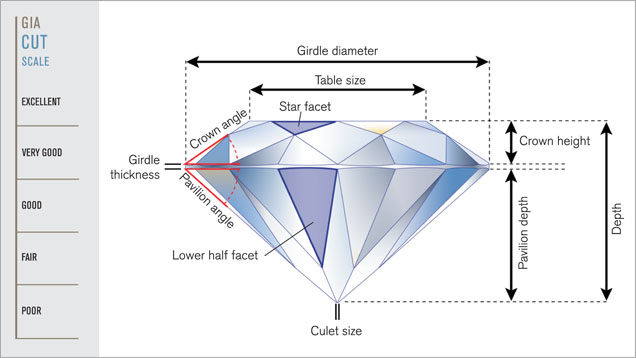

##Depth and depth percentage

The depth of a diamond might also be called the “height”: it is the distance from the table to the culet (the pointed tip) of the diamond.

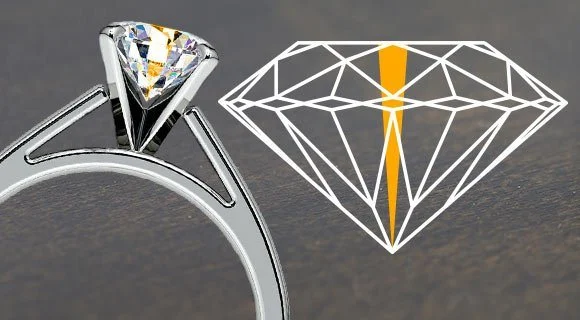

Like with a diamond’s table, jewelers grade a diamond’s depth based on its depth percentage.  You will notice two measurements of the depth on your diamond grading report; one will record the actual depth measurement in millimetres, the other is the depth percentage which notes how deep the diamond is in relation to its width.  A depth percentage can be treated as an indicator of a diamonds value and brilliance. The depth of a diamond can also help to make a modest diamond appear larger. This percentage dictates the overall proportions of the diamond, which in turn directly impact how light reflects off the facets in the stone. 

[Click here to know more about Ideal Diamond Depth Percentages](#Depth_Percentages)

Depth percentage is the diamond’s depth divided by the width of the diamond.

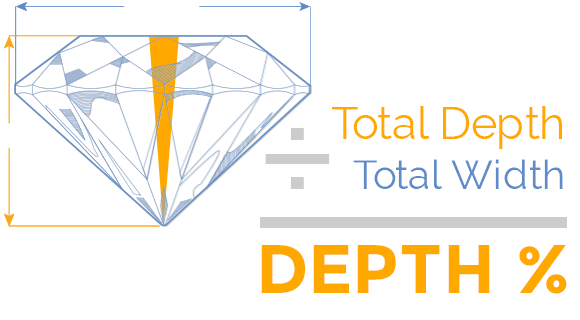

##Table and table percentage

Have you ever noticed that nearly every diamond has a flat, square-shaped facet on its top? This flat facet is called the table, and it plays a critical role in a diamond’s appearance. The table refracts rays of light as they pass, directing them to the facets that make the diamond look so sparkly.

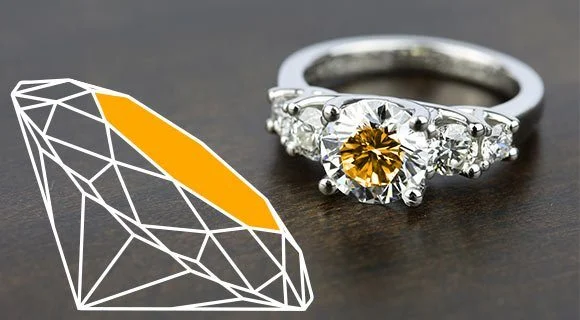

The ideal table percentage will vary based on the shape of your diamond. For example, the ideal table for round-cut diamonds is between 54-60 percent, while the ideal dimensions for emerald-cut diamonds puts table percentage between 66-72 percent.

[Click here to know more about Ideal Diamond Table Percentages](#Table_Percentages)

The diamond table percentage is a parameter obtained by dividing the width of the table portion by the width of the entire diamond. For instance, if the table is 2.5 mm wide and the diameter of the diamond is 5 mm, the table percentage is 50%.

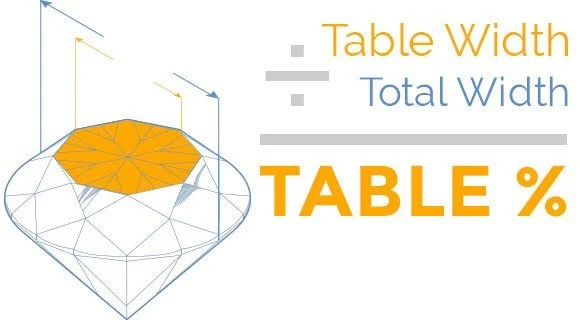

If the diamond table percentage is too large, then the light will be prevented from reflecting off the diamond’s crown facets and angles. This means the beautiful reflections will not be seen as the light will escape from the top of the diamond and will not reach the eyes.

If the diamond table percentage is too low, the light will escape through other parts of the diamond instead of finding its way to the eye.

# Import necessary libraries for the machine learning project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

# Upload the dataset

In [ ]:
data=pd.read_csv('/content/train.csv')
data_2=pd.read_csv('/content/train.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#(Data cleaning) Check null values and zeors 

In [ ]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Let's drop the examples with zeros

In [ ]:
rows_zeros = data.loc[(data==0).any(axis=1)]
data.drop(rows_zeros.index, inplace= True)
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
rows_zeros = data_2.loc[(data_2==0).any(axis=1)]
data_2.drop(rows_zeros.index, inplace= True)
data_2

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
# print the info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43023 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43023 non-null  int64  
 1   carat       43023 non-null  float64
 2   cut         43023 non-null  object 
 3   color       43023 non-null  object 
 4   clarity     43023 non-null  object 
 5   depth       43023 non-null  float64
 6   table       43023 non-null  float64
 7   price       43023 non-null  int64  
 8   x           43023 non-null  float64
 9   y           43023 non-null  float64
 10  z           43023 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.9+ MB


In [ ]:
# print the describe of the dataframe 
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000
mean,26760.203542,0.796685,61.746194,57.439135,3940.751807,5.724874,5.728482,3.535764
std,15484.832602,0.481183,1.434901,2.239621,4021.138491,1.129919,1.157478,0.711221
min,2.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13328.500000,0.380000,61.000000,56.000000,939.500000,4.660000,4.670000,2.870000
50%,26826.000000,0.710000,61.800000,57.000000,2387.000000,5.710000,5.720000,3.530000
75%,40291.500000,1.030000,62.500000,59.000000,5306.000000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#Discover and visualize the data to get insight 

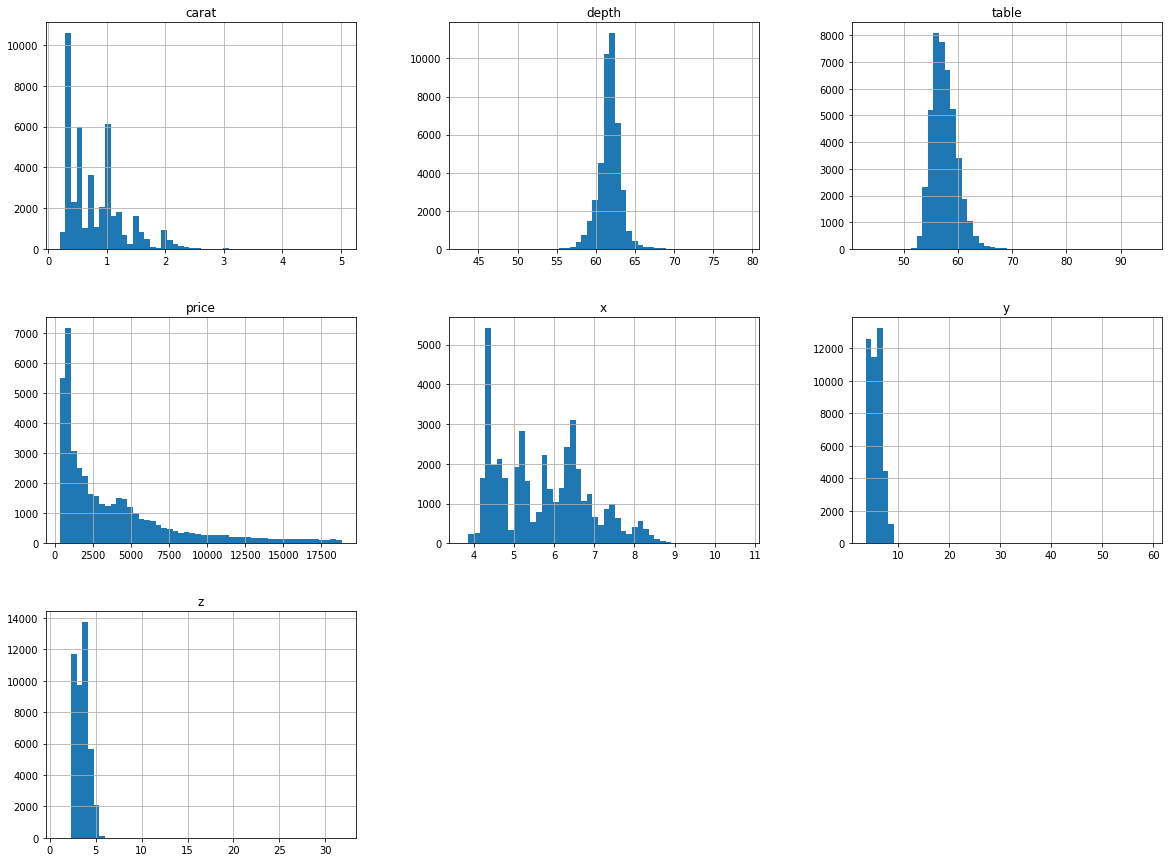

In [ ]:
data.drop(columns = 'Unnamed: 0').hist(bins=50,figsize=(20,15));

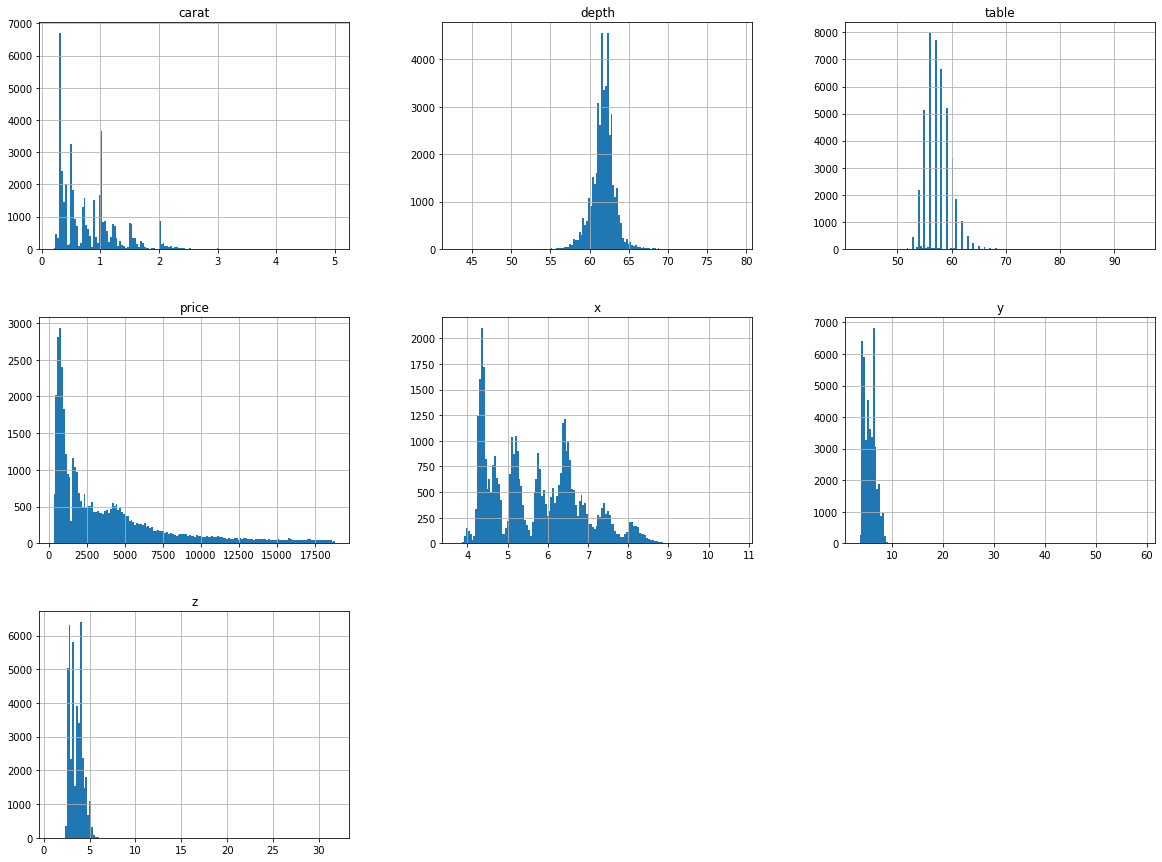

In [ ]:
data.drop(columns = 'Unnamed: 0').hist(bins=150,figsize=(20,15));

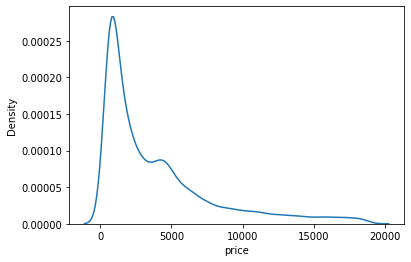

In [ ]:
sns.kdeplot(data['price']); #skewed to the right(positive skewness)

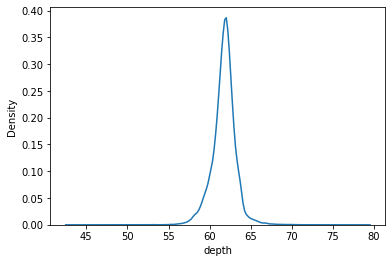

In [ ]:
sns.kdeplot(data['depth']); #bell-shaped 

### Looking for correlations

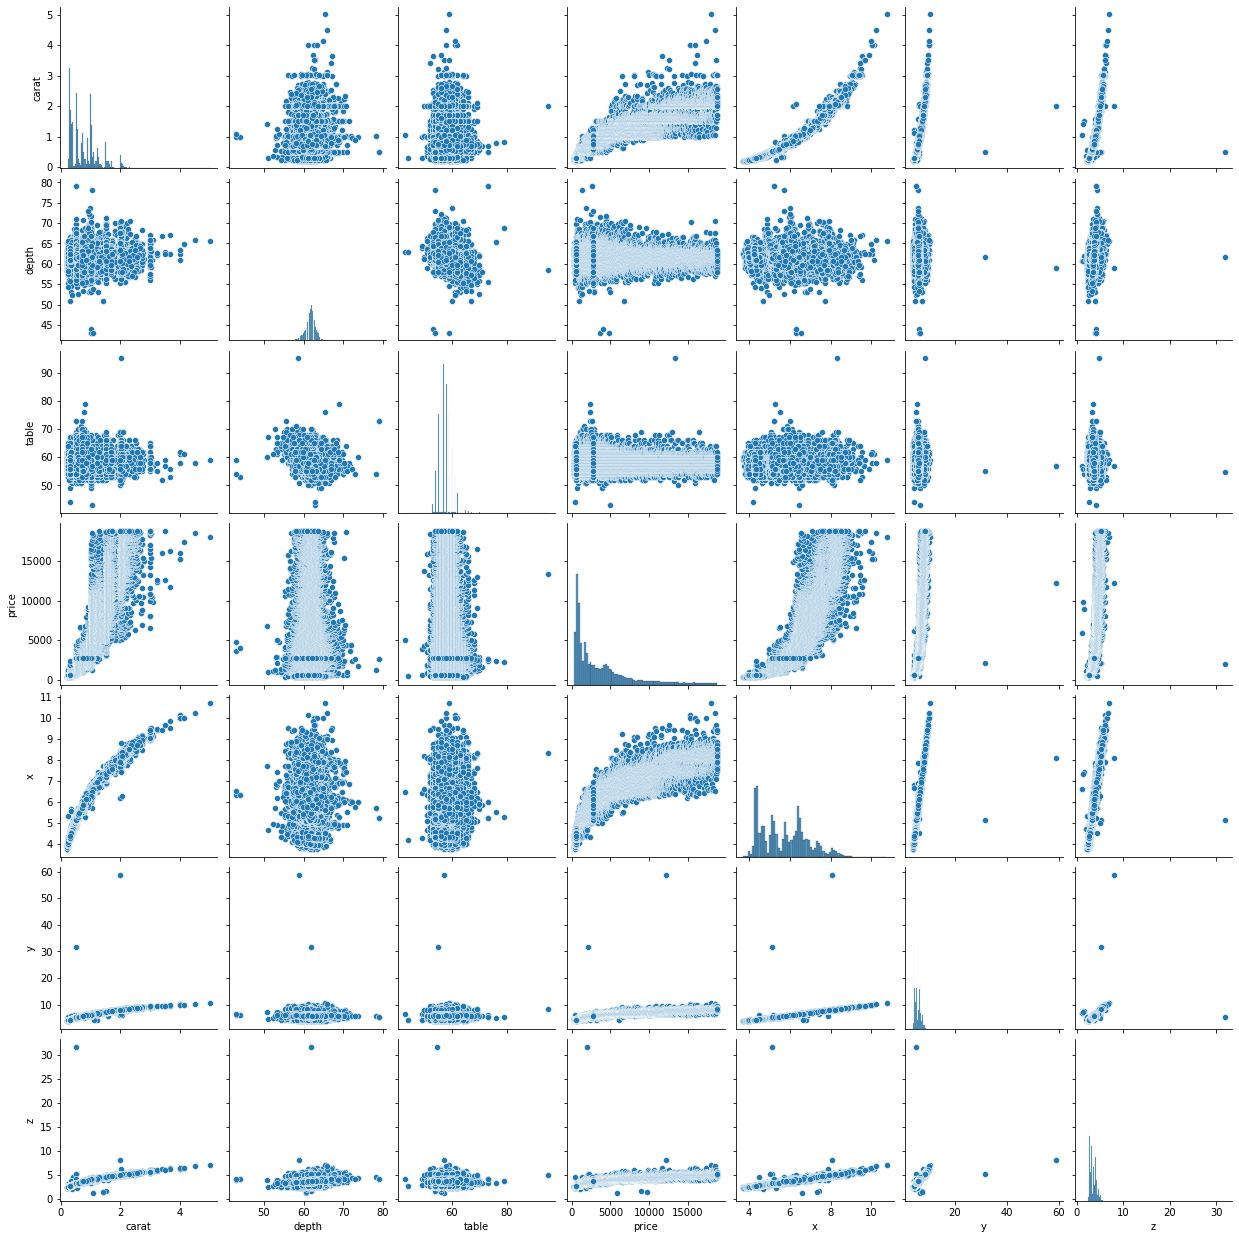

In [ ]:
sns.pairplot(data.drop(columns = 'Unnamed: 0'));

In [ ]:
corr_data= data.drop(columns= 'Unnamed: 0').corr()
corr_data["price"].sort_values(ascending=False)

price    1.000000
carat    0.923758
x        0.890222
z        0.867918
y        0.866044
table    0.137147
depth   -0.014500
Name: price, dtype: float64

In [ ]:
corr_data["depth"].sort_values(ascending=False)

depth    1.000000
z        0.088410
carat    0.022620
price   -0.014500
x       -0.030813
y       -0.034666
table   -0.291962
Name: depth, dtype: float64

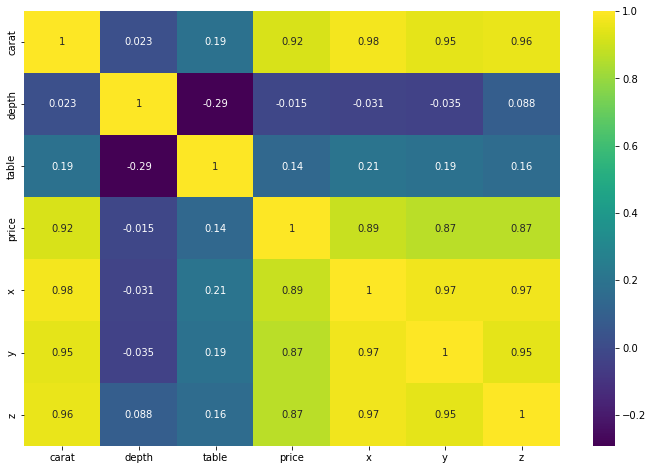

In [ ]:
figsize= plt.figure(figsize=(12,8))
sns.heatmap(corr_data, cmap='viridis', annot=True);

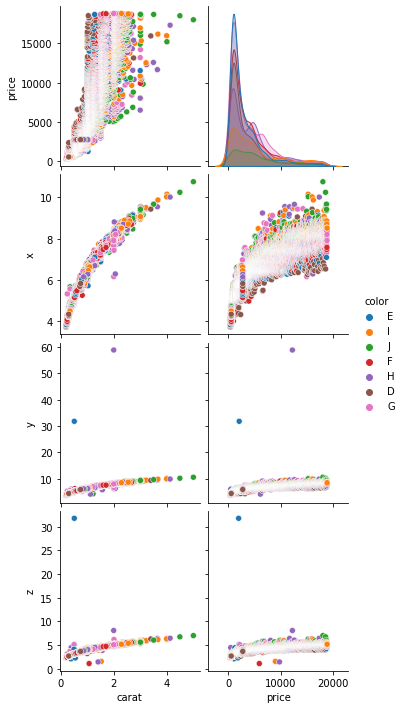

In [ ]:
sns.pairplot(data,hue='color',x_vars=['carat','price'],y_vars=['price','x','y','z']);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


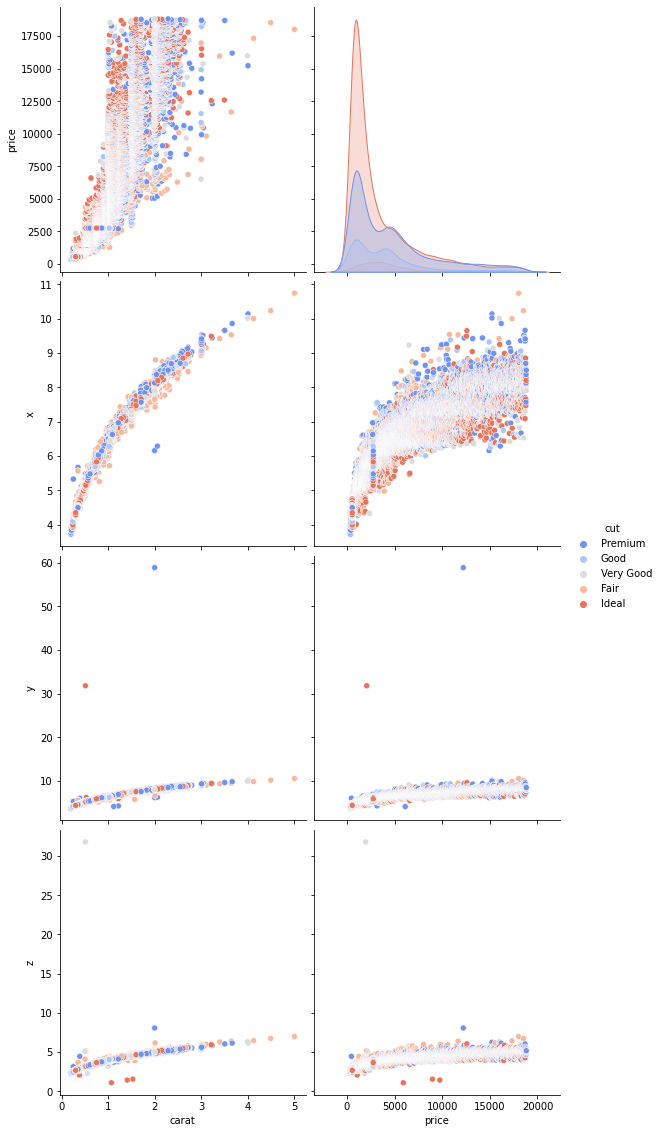

In [ ]:
sns.pairplot(data,hue='cut',x_vars=['carat','price'],
             y_vars=['price','x','y','z'],
             palette='coolwarm', size= 4);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


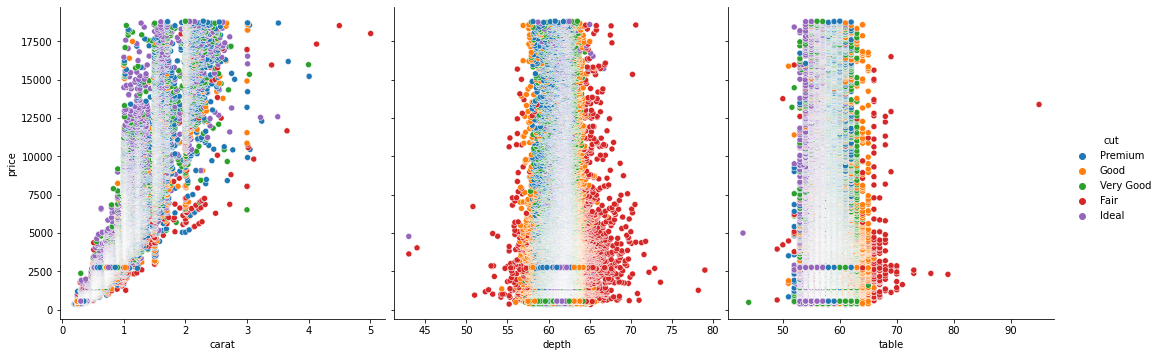

In [ ]:
sns.pairplot(
    data,
    x_vars=["carat", "depth", "table"],
    y_vars=["price"],
    hue='cut',
    size=5
);

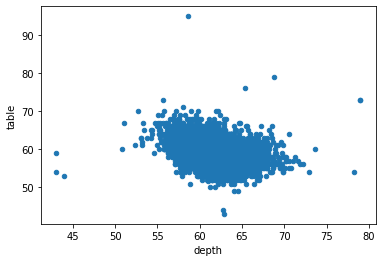

In [ ]:
data.plot.scatter(x='depth',y='table', cmap='coolwarm');

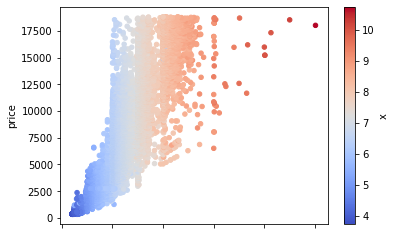

In [ ]:
data.plot.scatter(x='carat',y='price',c='x',cmap='coolwarm');

### Categorical attributes visulization

In [ ]:
[data['cut'].value_counts().sort_values(ascending=False),
 data['color'].value_counts().sort_values(ascending=False),
 data['clarity'].value_counts().sort_values(ascending=False)]

[Ideal        17422
 Premium      11022
 Very Good     9406
 Good          3906
 Fair          1267
 Name: cut, dtype: int64, G    9074
 E    7723
 F    7523
 H    6634
 D    5555
 I    4296
 J    2218
 Name: color, dtype: int64, SI1     10361
 VS2      9978
 SI2      7372
 VS1      6478
 VVS2     3959
 VVS1     2838
 IF       1483
 I1        554
 Name: clarity, dtype: int64]

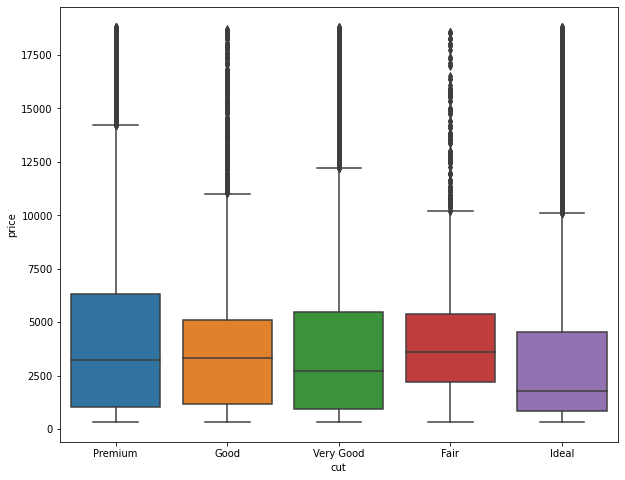

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='cut', y='price', data=data, orient='v');

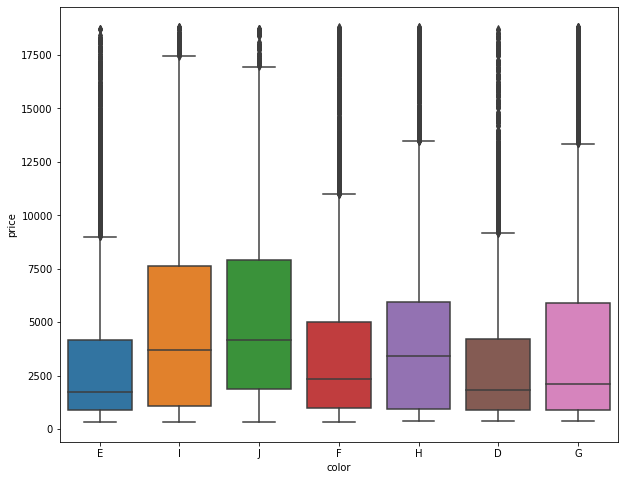

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='color', y='price', data=data, orient='v');

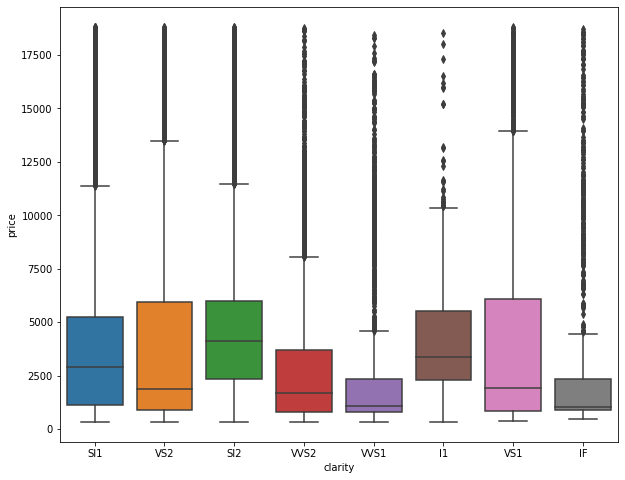

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='clarity',y='price',data=data);
#It seems that VS1 and VS2 affect the Diamond's Price equally 

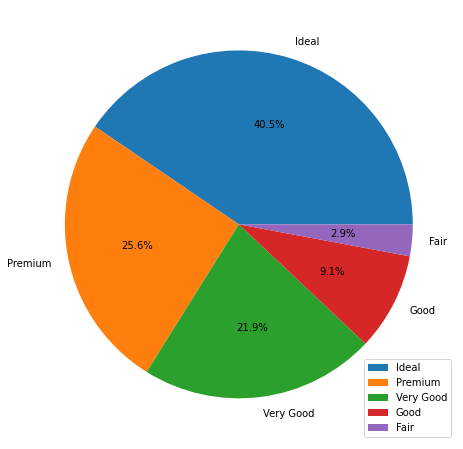

In [ ]:
labels_cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

plt.figure(figsize=(8,8))
plt.pie(data['cut'].value_counts(), labels=labels_cut ,autopct='%1.1f%%')
plt.legend(labels_cut, loc="lower right");

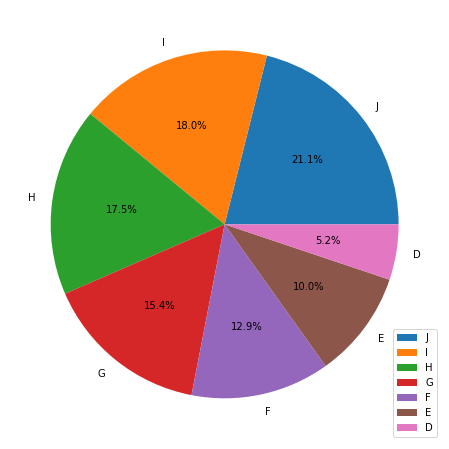

In [ ]:
labels_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

plt.figure(figsize=(8,8))
plt.pie(data['color'].value_counts(), labels=labels_color ,autopct='%1.1f%%')
plt.legend(labels_color, loc="lower right");

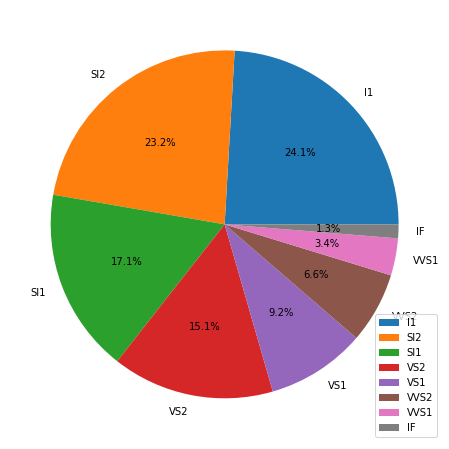

In [ ]:
labels_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

plt.figure(figsize=(8,8))
plt.pie(data['clarity'].value_counts(), labels=labels_clarity ,autopct='%1.1f%%')
plt.legend(labels_clarity, loc="lower right");

#Prepare data for machine learning algorithms

### Let's create a new feature, see the corr and notice the changes 

In [ ]:
data['volume'] = data['x'] * data['y'] * data['z']
corr_data= data.drop(columns= 'Unnamed: 0').corr()
corr_data["price"].sort_values(ascending=False)

price     1.000000
carat     0.923758
volume    0.902397
x         0.890222
z         0.867918
y         0.866044
table     0.137147
depth    -0.014500
Name: price, dtype: float64

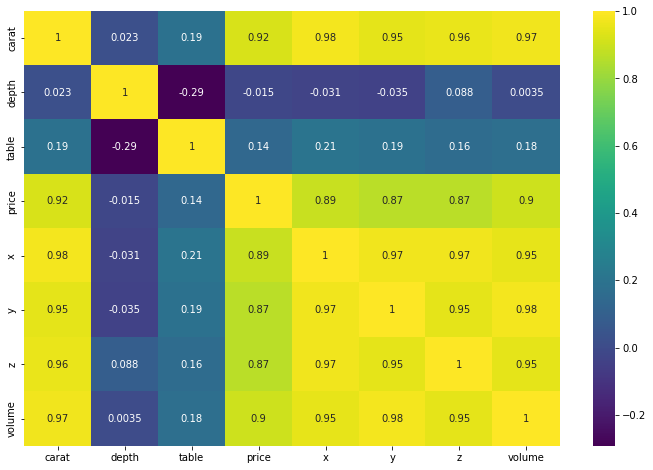

In [ ]:
figsize= plt.figure(figsize=(12,8))
sns.heatmap(corr_data, cmap='viridis', annot=True)

As we see here, the four cols (x, y, z, volume) is highly correlated to each other and this will lead us to something call multicollinearity which affects negativel on the prediction price. In addition, depending on some sources the seven main factors should be kept in mind while comparing the prices of diamonds. These include Shape, Cut, Color, Clarity, Carat, Grading Reports or "Certifications", and Diamond Fluorescence. The excellence of each of these factors makes the difference in the price of a diamond.




So, we're going to drop the unnecessary columns.

In [ ]:
data.drop('volume',axis=1,inplace=True)

In [ ]:
data_2.drop('x',axis=1,inplace=True)
data_2.drop('y',axis=1,inplace=True)
data_2.drop('z',axis=1,inplace=True)

In [ ]:
data_2

,Unnamed: 0,carat,cut,color,clarity,depth,table,price
0,2,0.21,Premium,E,SI1,59.8,61.0,326
1,4,0.29,Premium,I,VS2,62.4,58.0,334
2,5,0.31,Good,J,SI2,63.3,58.0,335
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336
...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757


In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


### convert categorical attributes into numerical

In [ ]:
# convert the cat values to numerical values 

cat_cols = ['cut', 'color', 'clarity']
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                              ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

diamond_cat_encoded = ordinal_encoder.fit_transform(data[cat_cols].copy())
diamond_cat_encoded

array([[3., 5., 2.],
       [3., 1., 3.],
       [1., 0., 1.],
       ...,
       [1., 6., 2.],
       [3., 2., 1.],
       [4., 6., 1.]])

In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


#Apply necessary preprocessing steps on the dataset

In [ ]:
predictors = data.drop(columns= ['price', 'z'])

In [ ]:
diamond_label = data.price

In [ ]:
num_var = predictors[['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y']]
cat_var = predictors[['cut', 'color', 'clarity']]
Binarizer_vars = predictors[['depth', 'table']]

##Building pipelines

###Full Pipeline

####Convert categorical attributes into numerical(Using Onehotencoder), Feature scaling (Power Transformer Scaler), we used Binarizer to depth and table columns and set the remainder to passthrough .

In [ ]:
cat_attribs = [2,3,4]
num_attribs = [0,1,5,6,7,8]
Binarizer_attribs = [5,6]

full_pipeline = make_column_transformer(
                                (OneHotEncoder(sparse = False),cat_attribs),
                                (PowerTransformer(),num_attribs),
                                (Binarizer(threshold = 50),Binarizer_attribs)
                                )

set_config(display = 'diagram')

full_pipeline

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [2, 3, 4]),
                                ('powertransformer', PowerTransformer(),
                                 [0, 1, 5, 6, 7, 8]),
                                ('binarizer', Binarizer(threshold=50), [5, 6])])

# Split data into training, testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(predictors , diamond_label, test_size=0.3)

In [ ]:
x_train.shape

(30116, 9)

In [ ]:
x_test.shape

(12907, 9)

In [ ]:
y_train.shape

(30116,)

In [ ]:
y_test.shape

(12907,)

#Select and train a model 

### Train the model ,prediction , and model evaluation 

#### Linear regression

In [ ]:
list_scores = {}

In [ ]:
#Create LinearRegression
Linreg=LinearRegression()

#add the algorithm to Full pipeline
Linreg_pipeline = make_pipeline(full_pipeline, Linreg)

# Train the model using the training sets
Linreg_pipeline.fit(x_train,y_train)

#Predict Output
y_pred=Linreg_pipeline.predict(x_test)

print(f'the r2  is: {r2_score(y_test,y_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
list_scores['RMSE_Linreg'] = np.sqrt(mean_squared_error(y_test,y_pred))

the r2  is: 0.8293803803280011
Mean absolute error: 1152.0027891841637
Mean squared error: 2714786.0438521733
RMSE: 1647.660779363329


####KNN

In [ ]:
#Create KNN with 10 neighbors
KNN=KNeighborsRegressor(n_neighbors=10)

#add the algorithm to Full pipeline
KNN_pipeline = make_pipeline(full_pipeline, KNN)

# Train the model using the training sets
KNN_pipeline.fit(x_train,y_train)

#Predict Output
y_pred=KNN_pipeline.predict(x_test)

print(f'the r2  is : {r2_score(y_test,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
list_scores['RMSE_KNN'] = np.sqrt(mean_squared_error(y_test,y_pred))

the r2  is : 0.9523877018687099
Mean absolute error:408.53870767800413
Mean squared error:757575.2585256064
RMSE: 870.3879930959563


In [ ]:
#Create KNN
KNN= KNeighborsRegressor()

#add the algorithm to Full pipeline
KNN_pipeline = make_pipeline(full_pipeline, KNN)

# Train the model using the training sets
KNN_pipeline.fit(x_train,y_train)

#Predict Output
y_pred=KNN_pipeline.predict(x_test)

print(f'the r2  is : {r2_score(y_test,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
list_scores['RMSE_KNN'] = np.sqrt(mean_squared_error(y_test,y_pred))

the r2  is : 0.9551291805975284
Mean absolute error:389.4810877818239
Mean squared error:713954.6701851707
RMSE: 844.9583837001504


#####DecisionTreeRegressor

In [ ]:
#Create DecisionTreeRegressor
DecTree= DecisionTreeRegressor()

#add the algorithm to Full pipeline
DecTree_pipeline = make_pipeline(full_pipeline, DecTree)

# Train the model using the training sets
DecTree_pipeline.fit(x_train, y_train)

#Predict Output
y_pred=DecTree_pipeline.predict(x_test)

print(f'the r2  is : {r2_score(y_test,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
list_scores['RMSE_DecTree'] = np.sqrt(mean_squared_error(y_test,y_pred))

the r2  is : 0.9998619731366845
Mean absolute error:4.510033315255288
Mean squared error:2196.1917564112496
RMSE: 46.86354400182779


####RandomForest

In [ ]:
#Create RandomForestRegressor()
RandomForest= RandomForestRegressor(n_estimators=400, random_state=42)

#add the algorithm to Full pipeline
RandomForest_pipeline = make_pipeline(full_pipeline, RandomForest)

# Train the model using the training sets
RandomForest_pipeline.fit(x_train,y_train)

#Predict Output
y_pred=RandomForest_pipeline.predict(x_test)

print(f'the r2  is : {r2_score(y_test,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
list_scores['RMSE_RandomForest'] = np.sqrt(mean_squared_error(y_test,y_pred))

the r2  is : 0.9998894436547752
Mean absolute error:4.5801843960641495
Mean squared error:1759.0991214999617
RMSE: 41.94161562815579


#### Ridge regression 

In [ ]:
ridge =  Ridge()

ridge_pipeline = make_pipeline(full_pipeline, ridge)

ridge_pipeline.fit(x_train,y_train)

y_pred = ridge_pipeline.predict(x_test)

print(f'the r2  is : {r2_score(y_test,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
list_scores['RMSE_Ridge'] = np.sqrt(mean_squared_error(y_test,y_pred))

the r2  is : 0.8296228081719533
Mean absolute error:1152.4609973680979
Mean squared error:2710928.693046516
RMSE: 1646.4898095787037


### Delete Outliers :

In [ ]:
predictors_label = pd.concat((pd.DataFrame(predictors, index = predictors.index), pd.DataFrame(diamond_label, columns=['price'])), axis=1)
predictors_label

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,price
0,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,326
1,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,334
2,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,335
3,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,336
4,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,336
...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,5.69,5.73,2757
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,2757
43037,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,2757
43038,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,2757


In [ ]:
from scipy import stats
import numpy as np

dims_out =pd.DataFrame(predictors_label[(np.abs(stats.zscore(predictors_label.select_dtypes(include=np.number)))<2.5).all(axis=1)])
dims_out

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,price
0,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,326
1,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,334
2,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,335
3,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,336
4,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,336
...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,5.69,5.73,2757
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,2757
43037,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,2757
43038,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,2757


In [ ]:
dims_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39206 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  39206 non-null  int64  
 1   carat       39206 non-null  float64
 2   cut         39206 non-null  object 
 3   color       39206 non-null  object 
 4   clarity     39206 non-null  object 
 5   depth       39206 non-null  float64
 6   table       39206 non-null  float64
 7   x           39206 non-null  float64
 8   y           39206 non-null  float64
 9   price       39206 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.3+ MB


In [ ]:
dims_out

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,price
0,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,326
1,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,334
2,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,335
3,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,336
4,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,336
...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,5.69,5.73,2757
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,2757
43037,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,2757
43038,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,2757


### split data


In [ ]:
predictors_out = dims_out.drop('price', axis=1)
label_out = dims_out['price']
from sklearn.model_selection import train_test_split
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(predictors_out, label_out, test_size=0.3)

In [ ]:
x_train2.shape

(27444, 9)

In [ ]:
x_test2.shape

(11762, 9)

In [ ]:
y_train2.shape

(27444,)

In [ ]:
y_test2.shape

(11762,)

###Train model after drop outliers 

#### Linear regression 

In [ ]:
Linreg_out = LinearRegression()
Linreg_out_pipeline = make_pipeline(full_pipeline, Linreg_out)
Linreg_out_pipeline.fit(x_train2,y_train2)
y_pred = Linreg_out_pipeline.predict(x_test2)

print(f'the mse is : {mean_squared_error(y_test2,y_pred)}')
print(f'the r2  is : {r2_score(y_test2,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test2,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test2,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test2,y_pred))}')
list_scores['RMSE_Linreg_out'] = np.sqrt(mean_squared_error(y_test2,y_pred))

the mse is : 1100764.159808608
the r2  is : 0.8768101961577633
Mean absolute error:752.0550057978354
Mean squared error:1100764.159808608
RMSE: 1049.1730838182077


#### Ridge regression 

In [ ]:
Ridge_out = Ridge()
Ridge_out_pipeline = make_pipeline(full_pipeline, Ridge_out)
Ridge_out_pipeline.fit(x_train2,y_train2)
y_pred = Ridge_out_pipeline.predict(x_test2)

print(f'the r2  is : {r2_score(y_test2,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test2,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test2,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test2,y_pred))}')
list_scores['RMSE_Ridge_out'] = np.sqrt(mean_squared_error(y_test2,y_pred))

the r2  is : 0.8766924610528554
Mean absolute error:752.6185876401761
Mean squared error:1101816.1834322517
RMSE: 1049.6743225554542


#### Lasso regression

In [ ]:
las_reg_out = Lasso()
las_reg_out_pipeline = make_pipeline(full_pipeline, las_reg_out)
las_reg_out_pipeline.fit(x_train2,y_train2)
y_pred = las_reg_out_pipeline.predict(x_test2)

print(f'the r2  is : {r2_score(y_test2,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test2,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test2,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test2,y_pred))}')
list_scores['RMSE_las_reg_out'] = np.sqrt(mean_squared_error(y_test2,y_pred))

the r2  is : 0.875205064841175
Mean absolute error:759.0726295558096
Mean squared error:1115106.8324160716
RMSE: 1055.9861895006352


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.070e+09, tolerance: 2.398e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


#### Random forest regressor

In [ ]:
random_reg_out = RandomForestRegressor(n_estimators=400)
random_reg_out_pipeline = make_pipeline(full_pipeline, random_reg_out)
random_reg_out_pipeline.fit(x_train2,y_train2)
y_pred = random_reg_out_pipeline.predict(x_test2)

print(f'the r2  is : {r2_score(y_test2,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test2,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test2,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test2,y_pred))}')
list_scores['RMSE_random_reg_out'] = np.sqrt(mean_squared_error(y_test2,y_pred))

the r2  is : 0.9998964255133896
Mean absolute error:3.728929816357764
Mean squared error:925.4912271579024
RMSE: 30.421887304339


#### XGBOOST

In [ ]:
XGBOOST = XGBRFRegressor()
XGBOOST_pipeline = make_pipeline(full_pipeline, XGBOOST)
XGBOOST_pipeline.fit(x_train2,y_train2)
y_pred = XGBOOST_pipeline.predict(x_test2)

print(f'the r2  is : {r2_score(y_test2,y_pred)}')
print(f'Mean absolute error:{mean_absolute_error(y_test2,y_pred)}')
print(f'Mean squared error:{mean_squared_error(y_test2,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test2,y_pred))}')
list_scores['RMSE_XGBOOST_out'] = np.sqrt(mean_squared_error(y_test2,y_pred))

[15:57:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the r2  is : 0.964133052174035
Mean absolute error:348.3327793535824
Mean squared error:320489.5978169513
RMSE: 566.1180069711185


####Best RMSE result between all algo's

In [ ]:
min_value = min(list_scores.values())
{key:value for key, value in list_scores.items() if value == min_value}

{'RMSE_random_reg_out': 30.421887304339}

In [ ]:
full_pipeline.fit(predictors)

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [2, 3, 4]),
                                ('powertransformer', PowerTransformer(),
                                 [0, 1, 5, 6, 7, 8]),
                                ('binarizer', Binarizer(threshold=50), [5, 6])])

##Using Cross Validation

In [ ]:
list_scores.keys()

dict_keys(['RMSE_Linreg', 'RMSE_KNN', 'RMSE_DecTree', 'RMSE_RandomForest', 'RMSE_Ridge', 'RMSE_Linreg_out', 'RMSE_Ridge_out', 'RMSE_las_reg_out', 'RMSE_random_reg_out', 'RMSE_XGBOOST_out'])

In [ ]:
cross_val_list_scores = {}

In [ ]:
def cross_val_predictions(model, model_name):

    model_name = model_name
    scores = cross_val_score(model, full_pipeline.fit_transform(predictors), diamond_label,
                         scoring="neg_mean_squared_error", cv=10)
    scores = np.sqrt(-scores)
    Mean = display_scores(model_name, scores)
    return Mean

In [ ]:
def cross_val_predictions_out(model, model_name):

    model_name = model_name
    scores = cross_val_score(model,  full_pipeline.fit_transform(predictors_out), label_out,
                         scoring="neg_mean_squared_error", cv=10)
    scores = np.sqrt(-scores)
    Mean = display_scores(model_name, scores)
    return Mean

In [ ]:
def display_scores(model_name, scores):
   print(f"{model_name}_Scores:", scores)
   print("Mean:", scores.mean())
   print("Standard deviation:", scores.std())
   Mean = scores.mean()
   return Mean

In [ ]:
cross_val_list_scores['RMSE_with_cross_Linreg'] = cross_val_predictions(Linreg, 'Linreg')

Linreg_Scores: [1268.30464767 1594.13895918 1702.72912779 1248.9490322  3724.83937972
 2942.32888919 1027.68606743  937.00352209 1145.9258338  2411.64464023]
Mean: 1800.3550099295637
Standard deviation: 882.6818276218162


In [ ]:
cross_val_list_scores['RMSE_with_cross_Linreg_out'] = cross_val_predictions_out(Linreg_out, 'Linreg_out')

Linreg_out_Scores: [1072.38342363 1079.61961477 1013.30598358  776.44535985 3245.61529427
  760.63879968  810.54578394  784.57596214  814.79474996 1440.44111937]
Mean: 1179.836609119023
Standard deviation: 717.5647653031548


In [ ]:
cross_val_list_scores['RMSE_with_cross_KNN'] = cross_val_predictions(KNN, 'KNN')

KNN_Scores: [1061.82686539  631.85225212  938.837534   1746.76305099 3025.2510883
 1941.12170234  157.23249171  305.87476306  290.99944648  800.85124348]
Mean: 1090.0610437862351
Standard deviation: 856.8198334545435


In [ ]:
cross_val_list_scores['RMSE_with_cross_KNN_out'] = cross_val_predictions_out(KNN, 'KNN_out')

KNN_out_Scores: [1045.05857871  622.65836558  815.03878955 1284.14632588 2984.17103067
  142.61445228  153.72942112  326.58307949  285.71404743  762.37730718]
Mean: 842.2091397891927
Standard deviation: 801.171958875528


In [ ]:
cross_val_list_scores['RMSE_with_cross_DecTree'] = cross_val_predictions(DecTree, 'DecTree')

DecTree_Scores: [ 597.38051653  285.25215146  446.78192244  910.2756662  2083.71875408
  482.88432903   94.03114932  208.26331487  181.6992543   568.69440814]
Mean: 585.8981466373676
Standard deviation: 549.3074093221169


In [ ]:
cross_val_list_scores['RMSE_with_cross_DecTree_out'] = cross_val_predictions_out(DecTree, 'DecTree_out')

DecTree_out_Scores: [ 581.87614446  271.7440273   407.44140667  767.01577073 2023.32232102
  201.08353961  248.42380058  189.46577352  184.69883857  429.8385702 ]
Mean: 530.4910192659842
Standard deviation: 529.4613741471871


In [ ]:
cross_val_list_scores['RMSE_with_cross_Ridge'] = cross_val_predictions(ridge, 'Ridge')

Ridge_Scores: [1268.061778   1601.49444585 1695.9245731  1238.43775327 3739.50821417
 2948.65945321 1020.34378014  920.09596118 1151.0910876  2417.20607718]
Mean: 1800.082312369344
Standard deviation: 889.5941895046898


In [ ]:
cross_val_list_scores['RMSE_with_cross_Ridge_out'] = cross_val_predictions_out(Ridge_out, 'Ridge_out')

Ridge_out_Scores: [1082.27677515 1078.17901998 1006.24548906  775.61101549 3253.09719699
  746.32384671  796.42333953  774.38960863  822.24244716 1445.20074531]
Mean: 1177.9989484009143
Standard deviation: 721.7602177680736


In [ ]:
cross_val_list_scores['RMSE_with_cross_las_reg'] = cross_val_predictions(las_reg_out, 'las_reg')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.927e+10, tolerance: 6.874e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e+10, tolerance: 6.898e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

las_reg_Scores: [1269.70744348 1624.00755375 1681.46168615 1214.91847465 3787.10110466
 2965.83565674 1000.85712381  878.79065902 1177.01724624 2435.26573936]
Mean: 1803.4962687853308
Standard deviation: 908.5759548380232


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.520e+10, tolerance: 6.785e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
cross_val_list_scores['RMSE_with_cross_las_reg_out'] = cross_val_predictions_out(las_reg_out, 'las_reg_out')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+10, tolerance: 3.410e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+10, tolerance: 3.378e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

las_reg_out_Scores: [1128.4689899  1075.56071048  967.44331004  781.49819754 3311.64257106
  743.2080093   763.84012038  731.20536434  863.96951057 1471.00190374]
Mean: 1183.7838687337296
Standard deviation: 742.3782195820346


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+10, tolerance: 3.381e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
cross_val_list_scores['RMSE_with_cross_XGBOOST'] = cross_val_predictions(XGBOOST, 'XGBOOST')

[15:59:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cross_val_list_scores['RMSE_with_cross_XGBOOST_out'] = cross_val_predictions_out(XGBOOST, 'XGBOOST_out')

[15:59:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cross_val_list_scores['RMSE_with_cross_RandomForest'] = cross_val_predictions(RandomForest, 'RandomForest')

RandomForest_Scores: [ 602.54416111  281.91765178  446.30137013  909.45636439 2086.34174233
  482.13914242   74.75694335  152.23335155  171.57399642  515.03704092]
Mean: 572.2301764420853
Standard deviation: 557.0550667569714


In [ ]:
cross_val_list_scores['RMSE_with_cross_random_reg_out'] = cross_val_predictions_out(random_reg_out, 'random_reg_out')

random_reg_out_Scores: [ 582.72196401  270.24269194  408.68901641  766.67860474 2023.30393468
  128.28921534  134.95989508  166.76352448  171.71395911  661.25851151]
Mean: 531.4621317294307
Standard deviation: 544.5997157895297


In [ ]:
min_value = min(cross_val_list_scores.values())
{key:value for key, value in cross_val_list_scores.items() if value == min_value}

{'RMSE_with_cross_DecTree_out': 530.4910192659842}

##Fine Tune the model

###GridSearchCV

In [ ]:
full_pipeline.fit_transform(predictors)

array([[ 0.        ,  0.        ,  0.        , ..., -2.08826506,
         1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.51887215,
         1.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., -1.35774475,
         1.        ,  1.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.15879625,
         1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.47469509,
         1.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.26436722,
         1.        ,  1.        ]])

In [ ]:
param_grid = [
      {'n_estimators': [3, 10, 30, 50, 80, 90 , 100], 'max_features': [2, 3, 4, 5, 6]},
      {'bootstrap': [False], 'n_estimators': [3, 10, 30, 40, 50], 'max_features': [2, 3, 4, 5, 6]},
]

In [ ]:
grid_search = GridSearchCV(
                          random_reg_out, param_grid, cv=10,
                          scoring='neg_mean_squared_error',
                          return_train_score=True
                        )

grid_search.fit(full_pipeline.fit_transform(predictors), diamond_label)

grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 50}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=50)

In [ ]:
cvres = grid_search.cv_results_
res = (
    pd.DataFrame({
        "mean_test_score": np.sqrt(-cvres['mean_test_score']),
        "mean_fit_time": cvres["mean_fit_time"]})
      .join(pd.DataFrame(grid_search.cv_results_["params"]).add_prefix("param_"))
)

In [ ]:
cv_results = res
cv_results.sort_values(by= 'mean_test_score')

,mean_test_score,mean_fit_time,param_max_features,param_n_estimators,param_bootstrap
49,784.225517,3.938533,4,50,False
18,788.957657,4.085265,4,80,NaN
20,792.383166,5.120756,4,100,NaN
25,798.519480,4.609070,5,80,NaN
19,803.044748,4.588473,4,90,NaN
44,803.421402,3.481909,3,50,False
47,804.006593,2.347592,4,30,False
43,804.573926,2.767782,3,40,False
24,804.684148,2.918170,5,50,NaN
53,805.906847,3.525843,5,40,False


##Analyze the best Model 

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.60635414e-04, 3.05639586e-04, 1.70274740e-03, 6.49791333e-04,
       2.87176315e-04, 1.95530169e-03, 1.36913908e-03, 1.07580097e-03,
       1.20548014e-03, 1.48897885e-03, 3.10481983e-03, 3.73531203e-03,
       5.06665819e-03, 3.04384695e-03, 2.41094628e-03, 7.51735167e-03,
       1.86499793e-03, 1.63483585e-03, 2.75767320e-03, 3.76110915e-03,
       2.23373831e-01, 2.34663642e-01, 3.59457440e-03, 4.42444147e-03,
       2.21281604e-01, 2.67059193e-01, 1.02162752e-06, 3.45134721e-06])

In [ ]:
attributes = list(predictors_out)
attributes

['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y']

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.001955301685488882, 'depth'),
 (0.0017027474045959168, 'cut'),
 (0.001369139083184903, 'table'),
 (0.0012054801434277856, 'y'),
 (0.0010758009719203756, 'x'),
 (0.0006606354144611953, 'Unnamed: 0'),
 (0.0006497913333289132, 'color'),
 (0.0003056395860654128, 'carat'),
 (0.0002871763152620949, 'clarity')]

#Evaluate the best model on the Test set (not the file the test it resulted from splitting data into (train, test))

In [ ]:
x_test2

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y
40617,50560,0.72,Premium,H,SI1,62.7,59.0,5.69,5.73
11065,13715,0.30,Ideal,E,VS2,62.0,57.0,4.26,4.29
42609,53375,0.73,Ideal,G,SI1,60.7,56.0,5.89,5.81
17264,21515,1.50,Very Good,I,VS2,62.2,59.0,7.34,7.30
10303,12752,1.00,Premium,H,VS2,62.6,59.0,6.37,6.31
...,...,...,...,...,...,...,...,...,...
4770,5940,0.96,Ideal,G,SI2,62.0,58.0,6.30,6.34
29963,37189,0.32,Premium,D,VVS1,62.0,60.0,4.40,4.37
15161,18763,1.07,Premium,E,VS2,59.3,56.0,6.71,6.69
25711,31873,0.30,Ideal,H,VVS2,62.1,56.0,4.32,4.28


In [ ]:
final_model = grid_search.best_estimator_
final_pipeline = make_pipeline(full_pipeline, final_model)

In [ ]:
final_predictions = final_pipeline.predict(x_test2)

In [ ]:
final_mse = mean_squared_error(y_test2, final_predictions)

In [ ]:
final_rmse = np.sqrt(final_mse)
final_rmse

0.1519175031757852

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test2) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.10789785, 0.18578458])

In [ ]:
import pickle
with open("model_randomforreg", "bw") as f:
  pickle.dump(obj=final_model, file=f)

#Let's try the model on the Test file

In [ ]:
test_set = pd.read_csv('test.csv')

FileNotFoundError: ignored

In [ ]:
test_set.info()

In [ ]:
(test_set == 0).sum()

In [ ]:
predictions = RandomForest_pipeline.predict(test_set)

In [ ]:
submission = test_set[['Unnamed: 0']]
submission

In [ ]:
submission['price'] = predictions

In [ ]:
#RandomForestRegressor(n_estimators=400), the best answer we got (submission_5.csv)
submission

In [ ]:
#RandomForest_2= RandomForestRegressor(n_estimators=290, random_state=42)
submission

In [ ]:
#RandomForestRegressor(n_estimators=300, random_state=42)
submission

In [ ]:
#final model (RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=50))
submission

In [ ]:
#DecisionTreeRegressor()
submission

In [ ]:
#RandomForestRegressor(n_estimators=400, random_state=42)
submission

In [ ]:
submission.to_csv('Submission_9.csv', index=False)

__________________

<a name="Table_Percentages"></a>
#More about Ideal Diamond Table Percentages

Below, we’ve listed the ideal table percentage range for the most common diamond shapes. Because diamonds are more complicated than just a few numbers, these ranges are intended as guidelines only:

*   For a round cut diamond, an excellent table range is 54 and 57 percent like this beautiful 1.05-carat round cut with a table of 57% from Blue Nile. A very good cut can have the table of 52 to 53 percent or 58 to 60 percent.

*   For a princess cut diamond, an ideal table takes up 69 to 75 percent of the width of the diamond See this example of a stunning 0.90-carat ideal cut princess diamond with a table of 71% from James Allen. A very good cut can be between 56 to 67 percent or 75 to 76 percent.

*   For a cushion cut diamond, an ideal table takes up 61 to 68 percent of the width of the diamond like this 1.80-carat diamond from Blue Nile. A very good cut has a range of 58 to 60 percent or 69 to 70 percent.

* For an Asscher cut or emerald cut diamond, an ideal table takes up 60 to 68 percent of the width of the diamond. Here’s a very sharp .90-carat emerald cut with a table of 67% from James Allen.

* For an oval cut diamond, an ideal table is between 53 and 63 percent. Here’s a beautiful 1.01-carat oval cut diamond from Blue Nile with a table of 54%.

* For a pear shape diamond, an ideal table size is 53 to 65 percent. This gorgeous 1.00-carat pear shape diamond from Blue Nile has a table of 62%.

* For a radiant cut diamond, an ideal table size is between 61 to 69 percent. For example, this stunning 1.01-carat radiant cut diamond from Blue Nile has a table of 66%.

* For a heart shape diamond, check for an ideal table that’s between 56 and 62 percent of the diamond’s total width. This impressive 0.90-carat heart shaped diamond from Blue Nile has a table of 60%.

* For a marquise diamond, an ideal table takes up 53 to 63 percent of the width of the diamond. Take a peak at this stunning 1.70-carat marquise with a table of 60% from Blue Nile. A very good cut can be between 52 and 64 to 65 percent.



In [ ]:
git push -u origin main
